In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

## Explanation `place_balloons()`:

- **Parameters:**
    - `num_balloons`: Number of balloons to place.
    - `sensor_range`: The communication range of each balloon.
    - `map_width` and `map_height`: Dimensions of the Cartesian map.

- **Special Case:** If there is only one balloon, place it at the center of the map.

- **Circumcircle Radius:** Calculate the radius of the circumcircle for a regular polygon with `num_balloons` sides using:
    ```python
    circumcircle_radius = sensor_range / (2 * math.sin(math.pi / num_balloons))
    ```

- **Center:** The balloons are centered at the middle of the map (`center_x`, `center_y`).

- **Positions Calculation:** Calculate the positions of the balloons at the vertices of the regular polygon using polar coordinates.


In [2]:
def place_balloons(num_balloons, sensor_range, map_width, map_height):
    if map_height < sensor_range * 2 or map_width < sensor_range * 2:
        raise Exception("Map dimension wrong")
    
    if num_balloons == 1:
        return [(map_width // 2, map_height // 2)]
    
    circumcircle_radius = sensor_range / (2 * math.sin(math.pi / num_balloons))
    
    balloon_positions = []
    
    center_x = map_width // 2
    center_y = map_height // 2
    
    print(f"Base Station position : ({center_x, center_y})")

    for i in range(num_balloons):
        angle = 2 * math.pi * i / num_balloons
        x = round(center_x + circumcircle_radius * math.cos(angle))
        y = round(center_y + circumcircle_radius * math.sin(angle))
        balloon_positions.append((x, y))

    return balloon_positions

In [3]:
def get_random_points_in_coverage(X, Y, coverage, num_points=5):
    covered_indices = np.argwhere(coverage)
    
    selected_indices = covered_indices[np.random.choice(covered_indices.shape[0], num_points, replace=False)]

    random_points = [(round(X[i, j]), round(Y[i, j])) for i, j in selected_indices]
    
    return random_points

## Explanation `plot_balloons()`:

- **Setup Plot:**

    - Create a plot with limits set to the map dimensions.
    - Create a grid of points across the map using np.meshgrid.
    - `x = np.linspace(0, map_width, 500) and y = np.linspace(0, map_height, 500)` generate 500 points along the width and height.

- **Coverage Calculation:**

    - Initialize a boolean array coverage to keep track of which points are within range of any balloon.
    - For each balloon position (bx, by), update the coverage array to mark points within the sensor range using the condition `(X - bx)**2 + (Y - by)**2 <= sensor_range**2`.

- **Plot Coverage Area:**

    - Use ax.contourf to fill the area covered by balloons in red. levels=[0, 0.5, 1] and colors=['none', 'red'] ensure the correct filling of the area covered by at least one balloon.

- **Plot Balloons:**

    - Draw circles representing the sensor range of each balloon and plot the balloon positions.


In [4]:
def plot_balloons(balloon_positions, sensor_range, map_width, map_height):
    fig, ax = plt.subplots()
    ax.set_xlim(0, map_width)
    ax.set_ylim(0, map_height)

    x = np.linspace(0, map_width, 500)
    y = np.linspace(0, map_height, 500)
    X, Y = np.meshgrid(x, y)
    coverage = np.zeros_like(X, dtype=bool)

    for (bx, by) in balloon_positions:
        coverage |= (X - bx)**2 + (Y - by)**2 <= sensor_range**2

    ax.contourf(X, Y, coverage, levels=[0, 0.5, 1], colors=['none', 'red'], alpha=0.5)

    sensor_positions = get_random_points_in_coverage(X, Y, coverage, num_points=5)
    print(f"Sensors positions: ", sensor_positions)

    for (x, y) in balloon_positions:
        circle = plt.Circle((x, y), sensor_range, color='blue', fill=False)
        ax.add_artist(circle)
        ax.plot(x, y, 'bo')  

    for (x, y) in sensor_positions:
        circle = plt.Circle((x, y), sensor_range, color='green', fill=False)
        ax.add_artist(circle)
        ax.plot(x, y, 'go')  

    plt.gca().set_aspect('equal', adjustable='box')
    plt.title('Balloon Placements and Sensor Coverage')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.show()

## Usage

Base Station position : ((50, 50))
Balloons positions: [(57, 50), (50, 57), (43, 50), (50, 43)]
Sensors positions:  [(58, 51), (61, 53), (51, 34), (42, 46), (54, 65)]


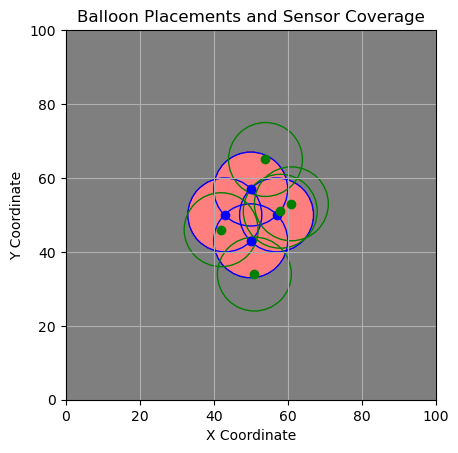

In [5]:
num_balloons = 4  
sensor_range = 10 
map_width = 100
map_height = 100
balloon_positions = place_balloons(num_balloons, sensor_range, map_width, map_height)
print(f"Balloons positions:", balloon_positions)

plot_balloons(balloon_positions, sensor_range, map_width, map_height)